In [1]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


In [12]:
'''
npart = 10
lim_sx, lim_dx = -4, 5
ind = dde.nn.pou_indicators(lim_sx, lim_dx, npart)
xx = np.linspace(lim_sx, lim_dx, 100)

sum = np.zeros(xx.shape)
for i in range(npart):
    plt.plot(xx, ind[i](xx))
    plt.show()
    sum += ind[i](xx)
print(sum)
'''

'\nnpart = 10\nlim_sx, lim_dx = -4, 5\nind = dde.nn.pou_indicators(lim_sx, lim_dx, npart)\nxx = np.linspace(lim_sx, lim_dx, 100)\n\nsum = np.zeros(xx.shape)\nfor i in range(npart):\n    plt.plot(xx, ind[i](xx))\n    plt.show()\n    sum += ind[i](xx)\nprint(sum)\n'

In [13]:
'''c1 = - 0.16171875
def func_dx(x, a=0):
    res = (c1 + 1/5*(x-a)**5 - (x-a)**4 + 47/24*(x-a)**3 - 15/8*(x-a)**2 + 225/256*(x-a))/0.001041666666667
    return res

c2 =  0.1627604166666665
def func_sx(x, a=0):
    res = (c2 + 1/5*(x-a)**5 + (x-a)**4 + 47/24*(x-a)**3 + 15/8*(x-a)**2 + 225/256*(x-a))/0.001041666666666
    return res

def pou(x, a=-1, b=1, lim_sx=-1, lim_dx=1):
    return tf.clip_by_value(1-func_dx(x, b-lim_dx), 0.0, 1.0) + tf.clip_by_value(func_sx(x, a-lim_sx), 0.0, 1.0) - 1

def pou_dx(x, b=1, uno=1.5, lim_dx=1):
    return tf.clip_by_value(func_sx(x, b-lim_dx+uno), 0.0, 1.0)# + tf.clip_by_value(func_sx(x,uno), 0.0, 1.0)

def pou_sx(x, a=-1, uno=1.5, lim_sx=-1):
    return tf.clip_by_value(1-func_dx(x, a-lim_sx-uno), 0.0, 1.0)

xx = np.linspace(-1.5, 1.5)
print(2-(1-0.3))
plt.plot(xx,pou_dx(xx, 1, 1.5))
plt.show()
plt.plot(xx, pou(xx, -0.5, 1))'''

'c1 = - 0.16171875\ndef func_dx(x, a=0):\n    res = (c1 + 1/5*(x-a)**5 - (x-a)**4 + 47/24*(x-a)**3 - 15/8*(x-a)**2 + 225/256*(x-a))/0.001041666666667\n    return res\n\nc2 =  0.1627604166666665\ndef func_sx(x, a=0):\n    res = (c2 + 1/5*(x-a)**5 + (x-a)**4 + 47/24*(x-a)**3 + 15/8*(x-a)**2 + 225/256*(x-a))/0.001041666666666\n    return res\n\ndef pou(x, a=-1, b=1, lim_sx=-1, lim_dx=1):\n    return tf.clip_by_value(1-func_dx(x, b-lim_dx), 0.0, 1.0) + tf.clip_by_value(func_sx(x, a-lim_sx), 0.0, 1.0) - 1\n\ndef pou_dx(x, b=1, uno=1.5, lim_dx=1):\n    return tf.clip_by_value(func_sx(x, b-lim_dx+uno), 0.0, 1.0)# + tf.clip_by_value(func_sx(x,uno), 0.0, 1.0)\n\ndef pou_sx(x, a=-1, uno=1.5, lim_sx=-1):\n    return tf.clip_by_value(1-func_dx(x, a-lim_sx-uno), 0.0, 1.0)\n\nxx = np.linspace(-1.5, 1.5)\nprint(2-(1-0.3))\nplt.plot(xx,pou_dx(xx, 1, 1.5))\nplt.show()\nplt.plot(xx, pou(xx, -0.5, 1))'

In [14]:
'''lim_sx, lim_dx = -1, 1
total = lim_dx-lim_sx
npart = 5
xx = np.linspace(lim_sx - 0.5, lim_dx + 0.5, 100)

def indicatrice(lim_sx, lim_dx, a, b, total, npart, i):
    if i == 0:
        return lambda x: pou_sx(x, a, -(np.abs(lim_dx) - np.abs(b)),lim_sx=lim_sx)
    elif i == npart-1:
        return lambda x: pou_dx(x, b,  total - np.abs(b), lim_dx=lim_dx)
    else:
        return lambda x: pou(x, a, b)

arr = np.linspace(lim_sx, lim_dx, npart+1)
print(arr)

ind = [indicatrice(lim_sx, lim_dx, arr[i], arr[i+1], total, npart, i) for i in range(npart)]


sum = np.zeros(xx.shape)
for j in range(npart):
    sum += ind[j](xx)
    plt.plot(xx, ind[j](xx))
    plt.show()
print(sum)'''

'lim_sx, lim_dx = -1, 1\ntotal = lim_dx-lim_sx\nnpart = 5\nxx = np.linspace(lim_sx - 0.5, lim_dx + 0.5, 100)\n\ndef indicatrice(lim_sx, lim_dx, a, b, total, npart, i):\n    if i == 0:\n        return lambda x: pou_sx(x, a, -(np.abs(lim_dx) - np.abs(b)),lim_sx=lim_sx)\n    elif i == npart-1:\n        return lambda x: pou_dx(x, b,  total - np.abs(b), lim_dx=lim_dx)\n    else:\n        return lambda x: pou(x, a, b)\n\narr = np.linspace(lim_sx, lim_dx, npart+1)\nprint(arr)\n\nind = [indicatrice(lim_sx, lim_dx, arr[i], arr[i+1], total, npart, i) for i in range(npart)]\n\n\nsum = np.zeros(xx.shape)\nfor j in range(npart):\n    sum += ind[j](xx)\n    plt.plot(xx, ind[j](xx))\n    plt.show()\nprint(sum)'

Compiling model...
'compile' took 0.000344 s



Training model...

Step      Train loss              Test loss               Test metric   
0         [4.87e+03, 1.26e+00]    [4.66e+03, 1.26e+00]    [1.91e+00]    
42        [1.20e-02, 5.27e-04]    [3.67e-01, 5.27e-04]    [2.89e-02]    

Best model at step 42:
  train loss: 1.25e-02
  test loss: 3.68e-01
  test metric: [2.89e-02]

'train' took 28.674643 s

Saving loss history to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\loss.dat ...
Saving training data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\train.dat ...
Saving test data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\test.dat ...


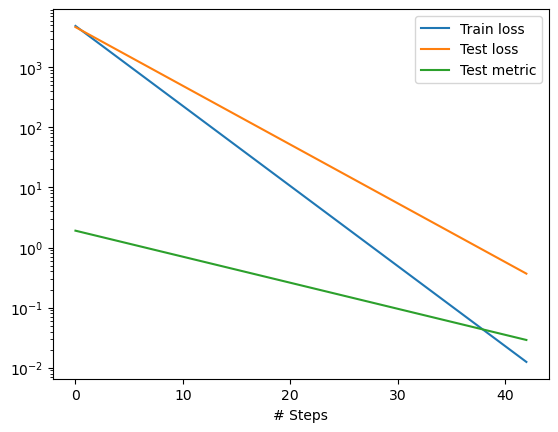

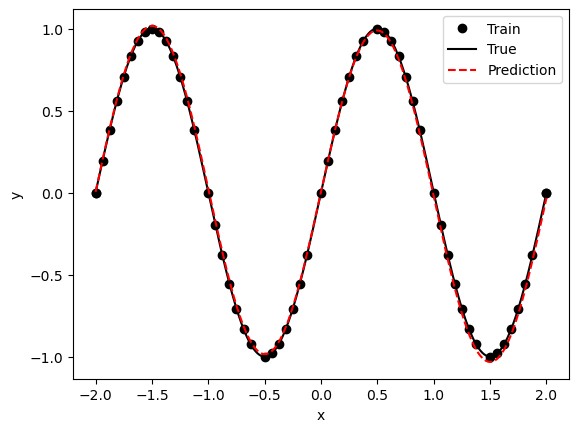

In [17]:
a, b = -1, 1
total = b-a
npart = 8
pi = np.pi
'''
c1 = - 0.16171875
def func_dx(x, a=0):
    res = (c1 + 1/5*(x-a)**5 - (x-a)**4 + 47/24*(x-a)**3 - 15/8*(x-a)**2 + 225/256*(x-a))/0.001041666666667
    return res

c2 =  0.1627604166666665
def func_sx(x, a=0):
    res = (c2 + 1/5*(x-a)**5 + (x-a)**4 + 47/24*(x-a)**3 + 15/8*(x-a)**2 + 225/256*(x-a))/0.001041666666666
    return res

def pou(x, a=-1, b=1, lim_sx=-1, lim_dx=1):
    return tf.clip_by_value(1-func_dx(x, b-lim_dx), 0.0, 1.0) + tf.clip_by_value(func_sx(x, a-lim_sx), 0.0, 1.0) - 1

def pou_dx(x, b=1, uno=1.5, lim_dx=1):
    return tf.clip_by_value(func_sx(x, b-lim_dx+uno), 0.0, 1.0)# + tf.clip_by_value(func_sx(x,uno), 0.0, 1.0)

def pou_sx(x, a=-1, uno=1.5, lim_sx=-1):
    return tf.clip_by_value(1-func_dx(x, a-lim_sx-uno), 0.0, 1.0)

def indicatrice(a,b,total,npart,i):
    if i == 0:
        return lambda x: pou_sx(x, a, total - (1-np.abs(b)))
    elif i == npart-1:
        return lambda x: pou_dx(x, b, total - (1-np.abs(a)))
    else:
        return lambda x: pou(x, a, b)

arr = np.linspace(a, b, npart+1)
print(arr)

ind = [indicatrice(arr[i], arr[i+1], total, npart, i) for i in range(npart)]
'''

def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    #return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    #return np.sin(np.pi * x)
    return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 1 #+2

geom = dde.geometry.Interval(a, b)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 56, 2, solution=func, num_test=500)
ind = dde.nn.pou_indicators(geom, npart)

M =200
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

R = 20
net = dde.nn.partioned_random_FNN(layer_size, activation, initializer, npart, ind, Rm=R, b=R/10)

model = dde.Model(data, net)
#wei = np.ones(2)
#wei[0] = 0
#wei = tf.convert_to_tensor(wei, dtype=tf.float32)

model.compile("L-BFGS", lr=0.001, metrics=["l2 relative error"])#, loss_weights=wei)

losshistory, train_state = model.train(iterations=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)